In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#p1_url = 'https://github.com/LucMaingard/solar-plant/blob/main/data/raw/Plant_1_Generation_Data.csv?raw=true'
#p2_url = 'https://github.com/LucMaingard/solar-plant/blob/main/data/raw/Plant_2_Generation_Data.csv?raw=true'
#w1_url = 'https://github.com/LucMaingard/solar-plant/blob/main/data/raw/Plant_1_Weather_Sensor_Data.csv?raw=true'
#w2_url = 'https://github.com/LucMaingard/solar-plant/blob/main/data/raw/Plant_2_Weather_Sensor_Data.csv?raw=true'
p1_url = '/Users/lucmaingard/Dropbox/work/projects/solar/data/raw/Plant_1_Generation_Data.csv'
p2_url = '/Users/lucmaingard/Dropbox/work/projects/solar/data/raw/Plant_2_Generation_Data.csv'
w1_url = '/Users/lucmaingard/Dropbox/work/projects/solar/data/raw/Plant_1_Weather_Sensor_Data.csv'
w2_url = '/Users/lucmaingard/Dropbox/work/projects/solar/data/raw/Plant_2_Weather_Sensor_Data.csv'

df_p1 = pd.read_csv(p1_url)
df_p2 = pd.read_csv(p2_url)

df_w1 = pd.read_csv(w1_url)
df_w2 = pd.read_csv(w2_url)

In [152]:
#examine datasets
print(df_p1.shape)
df_p1.head(3)

(68778, 7)


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0


In [153]:
df_p1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [154]:
#lowercase all column names
df_p1.columns=df_p1.columns.str.lower()
df_p2.columns=df_p2.columns.str.lower()
df_w1.columns=df_w1.columns.str.lower()
df_w2.columns=df_w2.columns.str.lower()
df_p1.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

In [170]:
#convert date_time to date time features
df_p1['time'] = pd.to_datetime(df_p1.date_time).dt.time
df_p1['date'] = pd.to_datetime(df_p1.date_time).dt.date
df_p1['week'] = pd.to_datetime(df_p1.date_time).dt.week
df_p1['hour'] = pd.to_datetime(df_p1.date_time).dt.hour
df_p1['minute'] = pd.to_datetime(df_p1.date_time).dt.minute

df_w1['time'] = pd.to_datetime(df_w1.date_time).dt.time
df_w1['date'] = pd.to_datetime(df_w1.date_time).dt.date


/Users/lucmaingard/opt/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [171]:
df_p1.describe()

,plant_id,dc_power,ac_power,daily_yield,total_yield,week,hour,minute
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04,68778.000000,68778.000000,68778.000000
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06,22.549507,11.567216,22.489313
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05,1.461099,6.862477,16.772774
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06,20.000000,0.000000,0.000000
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06,21.000000,6.000000,0.000000
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06,23.000000,12.000000,15.000000
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06,24.000000,17.000000,30.000000
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06,25.000000,23.000000,45.000000


In [172]:
df_p2.describe()

,plant_id,dc_power,ac_power,daily_yield,total_yield
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [173]:
#examine datasets
print(df_w1.shape)
df_w1.head(3)

(3182, 9)


,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation,minutes_since_last_weather_reading,time,date
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,15.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,15.0,00:15:00,2020-05-15
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,15.0,00:30:00,2020-05-15


In [174]:
df_p1.date_time = pd.to_datetime(df_p1.date_time, format='%d-%m-%Y %H:%M')
df_w1.date_time = pd.to_datetime(df_w1.date_time, format='%Y-%m-%d %H:%M')

In [177]:
df_w1.describe()

,plant_id,ambient_temperature,module_temperature,irradiation,minutes_since_last_weather_reading
count,3182.0,3182.000000,3182.000000,3182.000000,3182.0
mean,4135001.0,25.531606,31.091015,0.228313,15.0
std,0.0,3.354856,12.261222,0.300836,0.0
min,4135001.0,20.398505,18.140415,0.000000,15.0
25%,4135001.0,22.705182,21.090553,0.000000,15.0
50%,4135001.0,24.613814,24.618060,0.024653,15.0
75%,4135001.0,27.920532,41.307840,0.449588,15.0
max,4135001.0,35.252486,65.545714,1.221652,15.0


In [178]:
df_w2.describe()

,plant_id,ambient_temperature,module_temperature,irradiation
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


In [188]:
#compare min and max dates, and unique date count between weather and plant data to see if large amounts of dates are missing
df_p1.date_time.min(), df_p1.date_time.max(), df_w1.date_time.min(), df_w1.date_time.max(), df_p1.date_time.nunique(), df_w1.date_time.nunique()

(Timestamp('2020-05-15 00:00:00'),
 Timestamp('2020-06-17 23:45:00'),
 Timestamp('2020-05-15 00:00:00'),
 Timestamp('2020-06-17 23:45:00'),
 3158,
 3182)

In [181]:
df_p1.head()

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield,time,date,week,hour,minute
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,00:00:00,2020-05-15,20,0,0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,00:00:00,2020-05-15,20,0,0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,00:00:00,2020-05-15,20,0,0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,00:00:00,2020-05-15,20,0,0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,00:00:00,2020-05-15,20,0,0


In [166]:
df_w1.head()

,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation,minutes_since_last_weather_reading
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,15.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,15.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,15.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,15.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,15.0


In [182]:
#left join df's 
df_solar = pd.merge(df_p1.drop(columns = ['plant_id']), df_w1.drop(columns = ['plant_id', 'source_key']), on=('date', 'time'), how='left')
df_solar.head()

,date_time_x,source_key,dc_power,ac_power,daily_yield,total_yield,time,date,week,hour,minute,date_time_y,ambient_temperature,module_temperature,irradiation,minutes_since_last_weather_reading
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,00:00:00,2020-05-15,20,0,0,2020-05-15,25.184316,22.857507,0.0,15.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,00:00:00,2020-05-15,20,0,0,2020-05-15,25.184316,22.857507,0.0,15.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,00:00:00,2020-05-15,20,0,0,2020-05-15,25.184316,22.857507,0.0,15.0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,00:00:00,2020-05-15,20,0,0,2020-05-15,25.184316,22.857507,0.0,15.0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,00:00:00,2020-05-15,20,0,0,2020-05-15,25.184316,22.857507,0.0,15.0


In [184]:
df_solar.shape, df_solar.isna().sum()

((68778, 16),
 date_time_x                           0
 source_key                            0
 dc_power                              0
 ac_power                              0
 daily_yield                           0
 total_yield                           0
 time                                  0
 date                                  0
 week                                  0
 hour                                  0
 minute                                0
 date_time_y                           4
 ambient_temperature                   4
 module_temperature                    4
 irradiation                           4
 minutes_since_last_weather_reading    4
 dtype: int64)

In [186]:
#drop nulls
df_solar=df_solar.dropna()

In [189]:
df_solar['dc_to_irradiation'] = df_solar['dc_power']/df_solar['irradiation']

## Explore Data


In [190]:
def Daywise_plot(data= None, row = None, col = None, title='dc_to_irradiation'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        


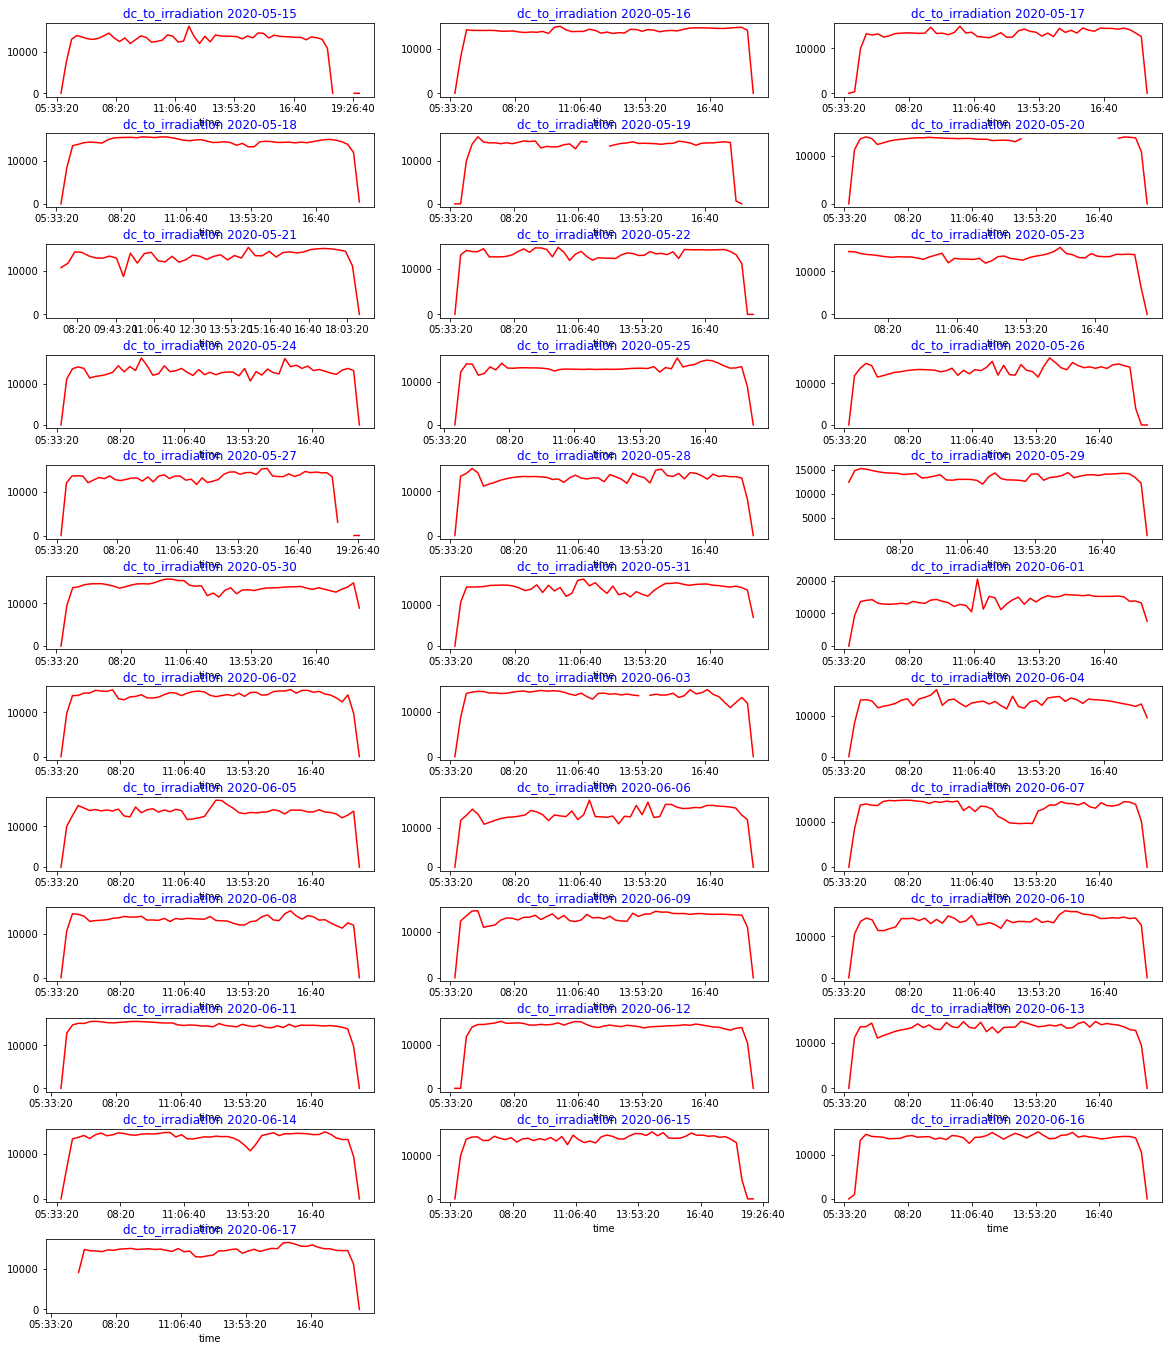

In [196]:
solar_irradiation = df_solar.pivot_table(values='dc_to_irradiation', index='time', columns='date')
Daywise_plot(data=solar_irradiation, row=20, col=3)

### Clear gaps in DC power production indicates faults in solar pannels. DC power generation to irratiation is rather consistent during daylight hours (~10000), meaning a drop in the ratio could indicate sensor cleaning/maintenance is required

In [244]:
solar_irradiation_grouped = df_solar.pivot_table(values='dc_to_irradiation', index='time', columns='date')
Daywise_plot(data=solar_irradiation, row=20, col=3)

KeyError: 'source_key'

In [253]:
df_solar.iloc[10,0]+datetime.timedelta(minutes=60)

Timestamp('2020-05-15 01:00:00')

In [261]:
test = df_solar[(df_solar.daily_yield>0) & (df_solar.source_key=='1BY6WEcLGh8j5v7') & (df_solar.date==datetime.date(2020, 5, 20))].copy()


#test.rename_axis('usedate').reset_index()
test.head()

,date_time_x,source_key,dc_power,ac_power,daily_yield,total_yield,time,date,week,hour,minute,date_time_y,ambient_temperature,module_temperature,irradiation,minutes_since_last_weather_reading,dc_to_irradiation
10102,2020-05-20 00:00:00,1BY6WEcLGh8j5v7,0.000000,0.000000,806.125000,6290097.000,00:00:00,2020-05-20,21,0,0,2020-05-20 00:00:00,22.465285,20.111123,0.000000,15.0,NaN
10630,2020-05-20 06:00:00,1BY6WEcLGh8j5v7,97.714286,9.442857,0.285714,6290097.286,06:00:00,2020-05-20,21,6,0,2020-05-20 06:00:00,21.348014,18.811700,0.009012,15.0,10843.015500
10652,2020-05-20 06:15:00,1BY6WEcLGh8j5v7,418.500000,40.475000,6.500000,6290103.500,06:15:00,2020-05-20,21,6,15,2020-05-20 06:15:00,21.709949,19.537301,0.032106,15.0,13035.127518
10674,2020-05-20 06:30:00,1BY6WEcLGh8j5v7,674.285714,65.285714,20.000000,6290117.000,06:30:00,2020-05-20,21,6,30,2020-05-20 06:30:00,21.996521,20.094381,0.051038,15.0,13211.418101
10696,2020-05-20 06:45:00,1BY6WEcLGh8j5v7,925.500000,89.875000,38.875000,6290135.875,06:45:00,2020-05-20,21,6,45,2020-05-20 06:45:00,22.155996,20.623102,0.071392,15.0,12963.703576


ValueError: num must be 1 <= num <= 30, not 31

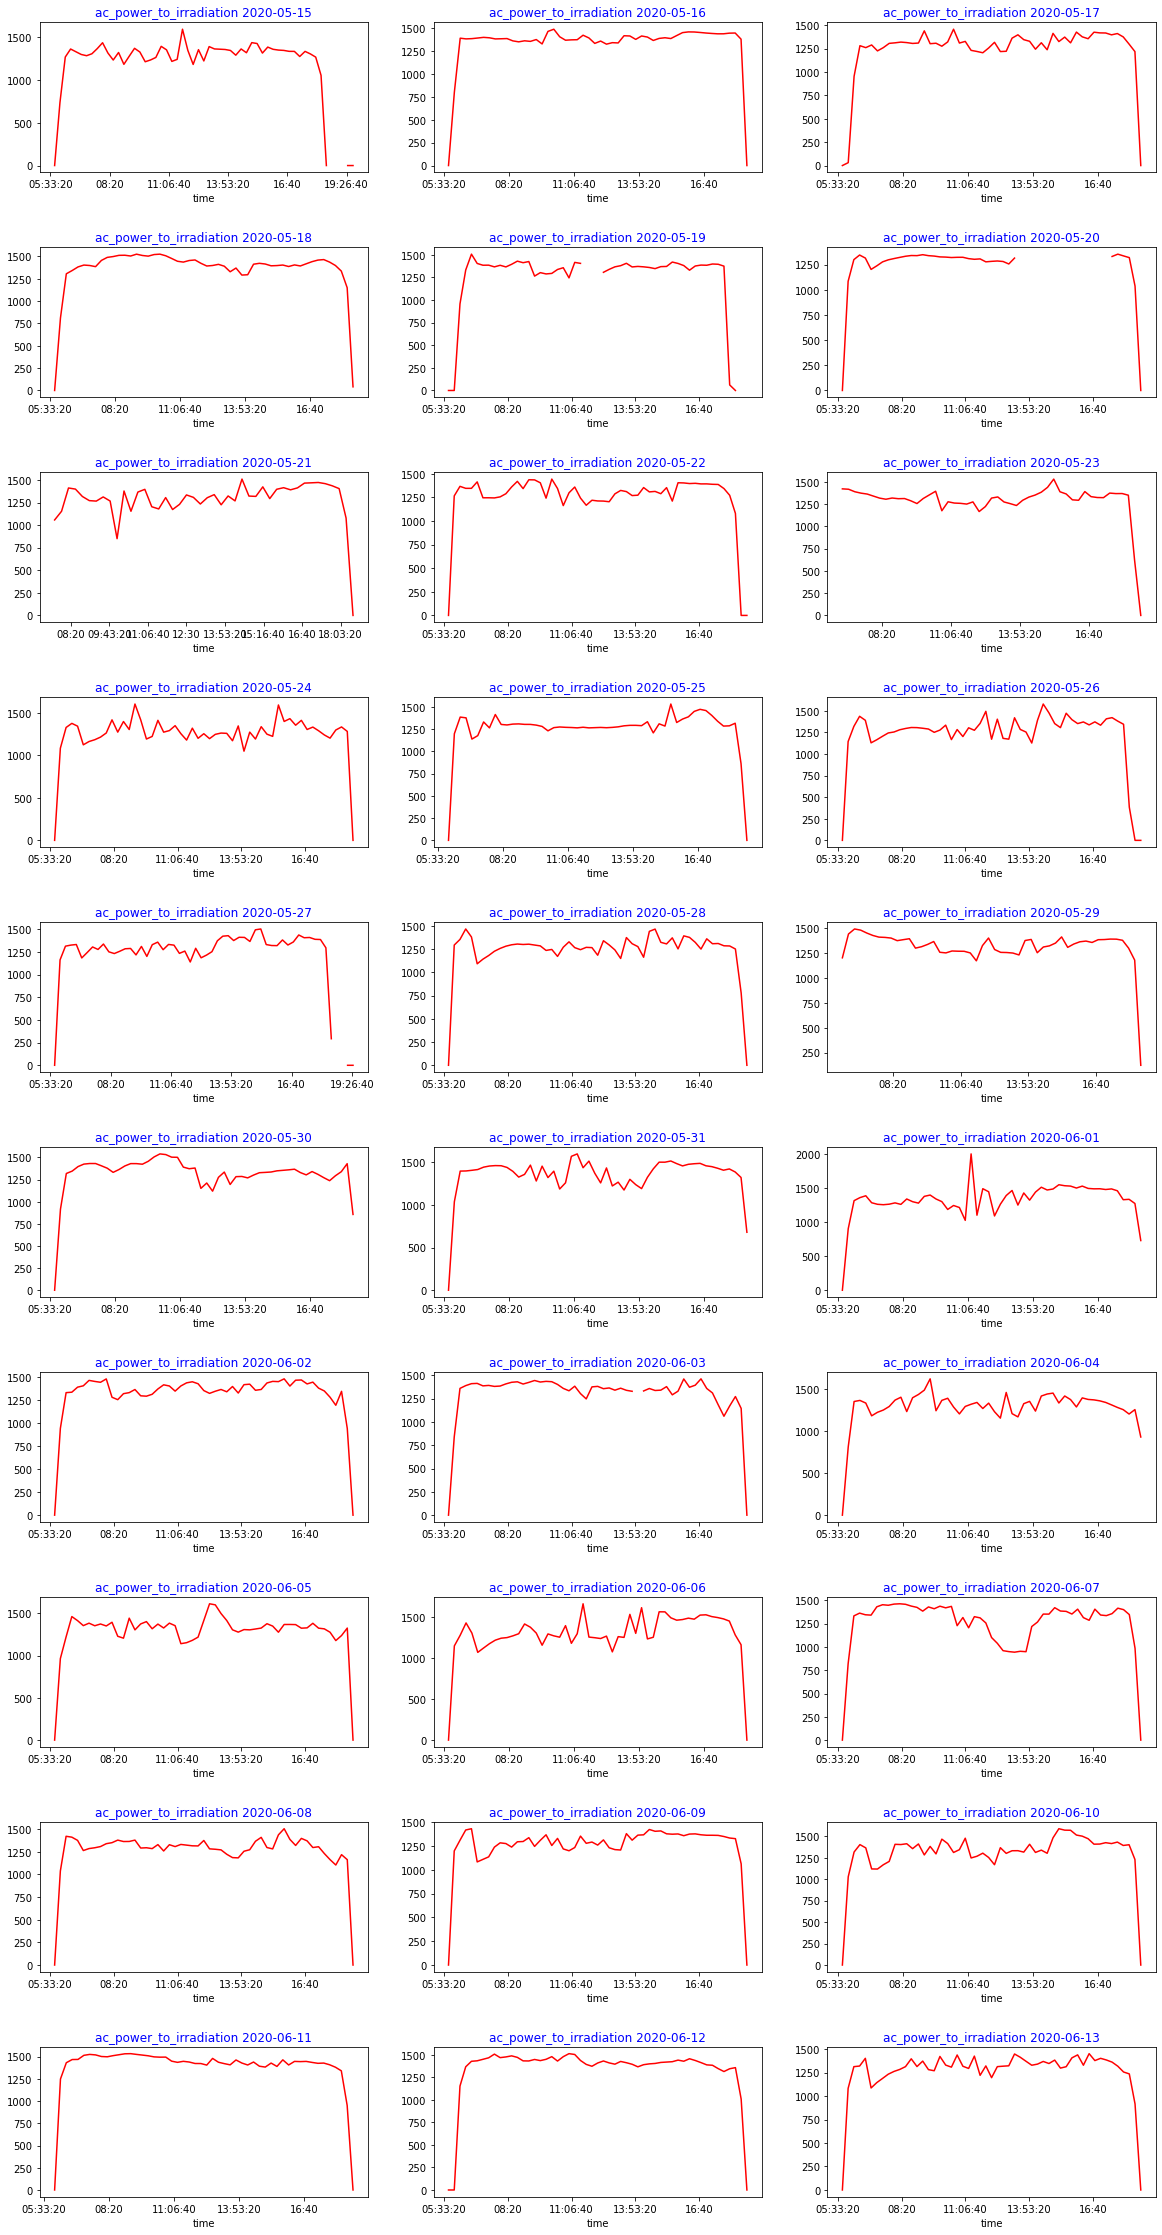

In [204]:
temp_solar = df_solar.copy()
temp_solar['ac_power_to_irradiation'] = temp_solar['ac_power']/temp_solar['irradiation']
solar_irradiation = temp_solar.pivot_table(values='ac_power_to_irradiation', index='time', columns='date')
Daywise_plot(data=solar_irradiation, row=10, col=3, title='ac_power_to_irradiation')

In [ ]:
#find time of day where dc_to_irradiation < 10000, only consider daylight hours and look for readings that are 
# more than 2 std_deviations below expected reading
# notify when null readings are sent through (include count of nulls when two in a row then notify)
# notify when readings are below two std_deviations for two conseciutive readings (maintenance)
# use LSTM model to predict readings of future dated yields ()

In [229]:
import datetime
temp = df_solar[df_solar.date==datetime.date(2020, 5, 20)]
temp = temp[temp.time>=datetime.time(13, 0)]
#temp = temp[temp.dc_to_irradiation<10000]
temp.time.unique()

array([datetime.time(13, 0), datetime.time(13, 15), datetime.time(17, 30),
       datetime.time(17, 45), datetime.time(18, 0), datetime.time(18, 15),
       datetime.time(18, 30), datetime.time(18, 45), datetime.time(19, 0),
       datetime.time(19, 15), datetime.time(19, 30),
       datetime.time(19, 45), datetime.time(20, 0), datetime.time(20, 15),
       datetime.time(20, 30), datetime.time(20, 45), datetime.time(21, 0),
       datetime.time(21, 15), datetime.time(21, 30),
       datetime.time(21, 45), datetime.time(22, 0), datetime.time(22, 15),
       datetime.time(22, 30), datetime.time(22, 45)], dtype=object)